In [1]:
import gymnasium as gym
from src.basic_agent import BasicAgent
import matplotlib.pyplot as plt
import numpy as np

Processed 1/30 Agents
Processed 2/30 Agents
Processed 3/30 Agents
Processed 4/30 Agents
Processed 5/30 Agents
Processed 6/30 Agents
Processed 7/30 Agents
Processed 8/30 Agents
Processed 9/30 Agents
Processed 10/30 Agents
Processed 11/30 Agents
Processed 12/30 Agents
Processed 13/30 Agents
Processed 14/30 Agents
Processed 15/30 Agents
Processed 16/30 Agents
Processed 17/30 Agents
Processed 18/30 Agents
Processed 19/30 Agents
Processed 20/30 Agents
Processed 21/30 Agents
Processed 22/30 Agents
Processed 23/30 Agents
Processed 24/30 Agents
Processed 25/30 Agents
Processed 26/30 Agents
Processed 27/30 Agents
Processed 28/30 Agents
Processed 29/30 Agents
Processed 30/30 Agents


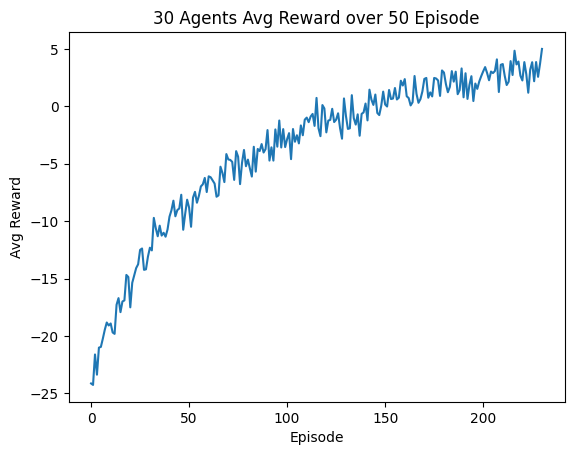

In [2]:
reward_hists = []
reps = 30
total_steps = 1500000
# total_steps = 200000
for rep in range(reps):
    env = gym.make("LunarLander-v2")
    observation, info = env.reset()
    agent = BasicAgent()
    action = agent.start_step()
    reward_hist = []
    total_reward = 0
    ep_steps = 0
    ep_id = 0
    for _ in range(total_steps):
        observation, reward, terminated, truncated, info = env.step(action)
        ep_steps += 1
        if terminated or truncated:
            ep_id += 1
            reward = agent.terminal_step(observation, reward)
            total_reward += reward
            reward_hist.append(total_reward/ep_steps)
            total_reward = 0
            ep_steps = 0
            observation, info = env.reset()
            action = agent.start_step()
        else:
            action, reward = agent.step(observation, reward)
            total_reward += reward

    reward_hists.append(reward_hist)
    print(f"Processed {rep+1}/{reps} Agents")

# Each agent will have different number of episodes
# Find the agent with the minimum number of episodes
min_len = 0
first = True
for hist in reward_hists:
    hist_len = len(hist)
    if first:
        first = False
        min_len = hist_len
    else:
        if hist_len < min_len:
            min_len = hist_len

# Avg all the agents togther by episode up to the index for the agent with minimum episodes
avg_reward_hist = []
for i in range(min_len):
    cummu_reward = 0
    for hist in reward_hists:
        cummu_reward += hist[i]
    cummu_reward = cummu_reward/reps
    avg_reward_hist.append(cummu_reward)


# Group episodes into batches
batch_hist = []
batch = 50
bval = 0
b_iter = 1
for val in avg_reward_hist:
    b_iter += 1
    if (b_iter % batch) != 0:
        bval += val
    else:
        bval = bval/batch
        batch_hist.append(bval)
        bval = 0

plt.plot(batch_hist)
plt.title(f"{reps} Agents Avg Reward over {batch} Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()